Programa para hacer upsampling de una serie de datos no equidistantes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datafile = 'G3922-02 - espacio - VF.csv' # Archivo a Interpolar
df = pd.read_csv('./VF/' + datafile)     # Directorio

In [3]:
df.columns = ['timestamps','values']
timestamps = pd.to_datetime(df['timestamps'].values)
values = df['values'].values

#------ Tambien puedes interpolar valores en especifico------#
#values = [722.46,5]
#timestamps = pd.to_datetime(['4/22/2018 4:00:02','4/22/2018 14:00:00'])

In [4]:
ts = pd.Series(values, index=timestamps)

In [5]:
ts = ts[~ts.index.duplicated()]
ts[ts==-1] = np.nan

In [6]:
newFreq=ts.resample('2S').asfreq()

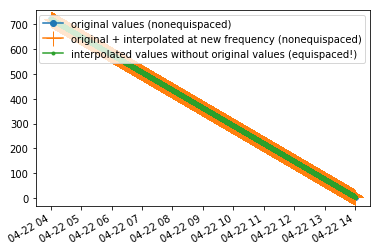

In [7]:
new = (ts.reindex(ts.index | newFreq.index)
           .interpolate(method='time')
           .loc[newFreq.index])

ts.plot(marker='o')
new.plot(marker='+',markersize=15)

new[newFreq.index].plot(marker='.')

lines, labels = plt.gca().get_legend_handles_labels()
labels = ['original values (nonequispaced)', 'original + interpolated at new frequency (nonequispaced)', 'interpolated values without original values (equispaced!)']
plt.legend(lines, labels, loc='best')
plt.show()

In [8]:
# Se guarda el nuevo archivo
datafile = 'interpolated_' + datafile
new.to_csv('./VF/' + datafile)